
ACME is one of the fastest growing startups in the logistics and delivery domain. We work with several partners and make on-demand delivery to our customers. During the COVID-19 pandemic, we are facing several different challenges and everyday we are trying to address these challenges.

At ACME we thrive for making our customers happy. As a growing startup, with a global expansion strategy we know that we need to make our customers happy and the only way to do that is to measure how happy each customer is. If we can predict what makes our customers happy or unhappy, we can then take necessary actions.

Getting feedback from customers is not easy either, but we do our best to get constant feedback from our customers. This is a crucial function to improve our operations across all levels.

We recently did a survey to a select customer cohort. You are presented with a subset of this data. We will be using the remaining data as a private test set.

Data Description:


Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers

X1 = my order was delivered on time

X2 = contents of my order was as I expected

X3 = I ordered everything I wanted to order


X4 = I paid a good price for my order

X5 = I am satisfied with my courier

X6 = the app makes ordering easy for me


Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.


**Goal(s):
Predict if a customer is happy or not based on the answers they give to questions asked.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15

import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics

seed=157

In [2]:
df=pd.read_csv('ACME-HappinessSurvey2020.csv')
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Y,126.0,0.547619,0.499714,0.0,0.0,1.0,1.0,1.0
X1,126.0,4.333333,0.800000,1.0,4.0,5.0,5.0,5.0
X2,126.0,2.531746,1.114892,1.0,2.0,3.0,3.0,5.0
X3,126.0,3.309524,1.023440,1.0,3.0,3.0,4.0,5.0
X4,126.0,3.746032,0.875776,1.0,3.0,4.0,4.0,5.0
X5,126.0,3.650794,1.147641,1.0,3.0,4.0,4.0,5.0
X6,126.0,4.253968,0.809311,1.0,4.0,4.0,5.0,5.0


In [5]:
df.Y.value_counts()

1    69
0    57
Name: Y, dtype: int64

In [6]:
df.Y.value_counts(normalize = True) #Somewhat Balanced

1    0.547619
0    0.452381
Name: Y, dtype: float64

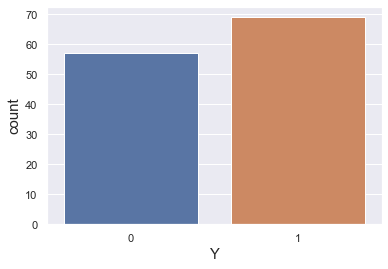

In [7]:
sns.countplot(x = 'Y', data = df);
#Roughly Balanced

In [8]:
df.columns[1:]

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6'], dtype='object')

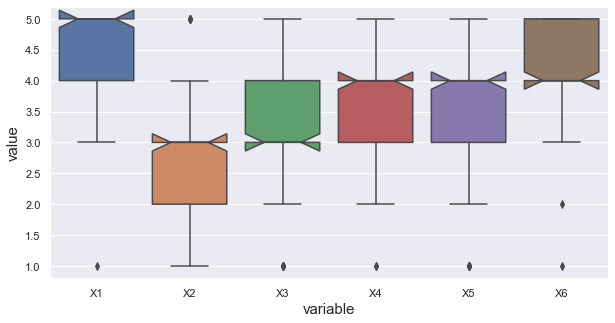

In [9]:
plt.figure(figsize = (10,5))
sns.boxplot(x="variable", y="value", data=pd.melt(df.iloc[:,1:]), notch=True);

X1 = More people agree that their order was delivered on time. (Mean = 4.33, Median = 5)

X2 = People felt that the contents of their order was not as they expected. (Mean = 2.53, Median = 3)

X3 = People were neautral about ordering everything they wanted to order. (Mean = 3.30, Median = 3)

X4 = People somewhat agreed that they paid a good price for their order (Mean = 3.75, Medain = 4)

X5 = People somewhat agreed that they were satisfied with their order (Mean = 3.65, Median = 4)

X6 = People somewhat agreed that the app makes ordering easy (Mean = 4.25, Median = 4)

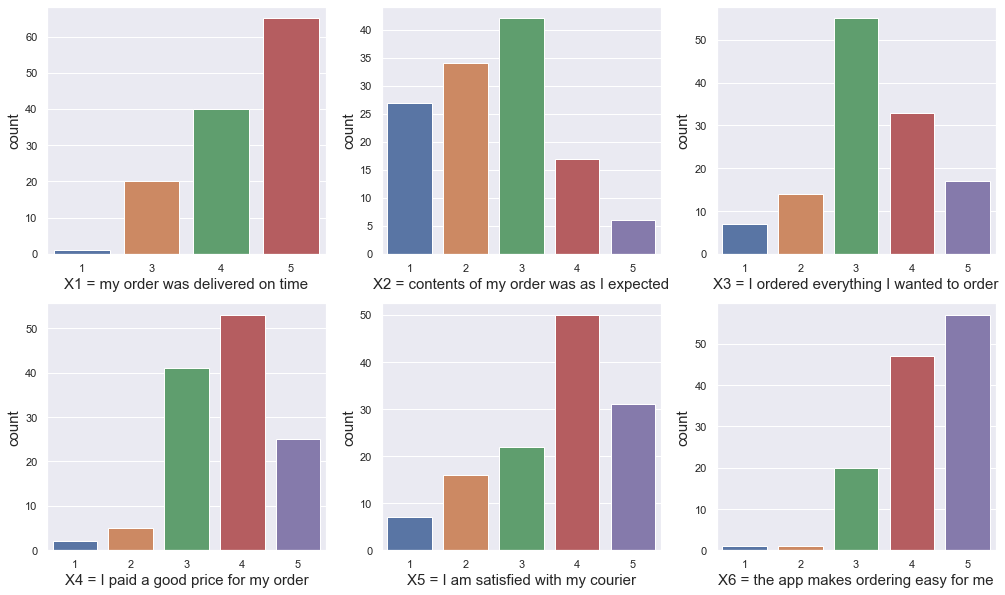

In [10]:
axis_names = ['X1 = my order was delivered on time', 'X2 = contents of my order was as I expected', 
              'X3 = I ordered everything I wanted to order', 'X4 = I paid a good price for my order',
              'X5 = I am satisfied with my courier', 'X6 = the app makes ordering easy for me']

fig, axes = plt.subplots(2,3, figsize=(17, 10))

for col, ax, name in zip(df.columns[1:],axes.flatten(), axis_names):
    sns.countplot(x = col, data = df, ax = ax)
    ax.set(xlabel=name);

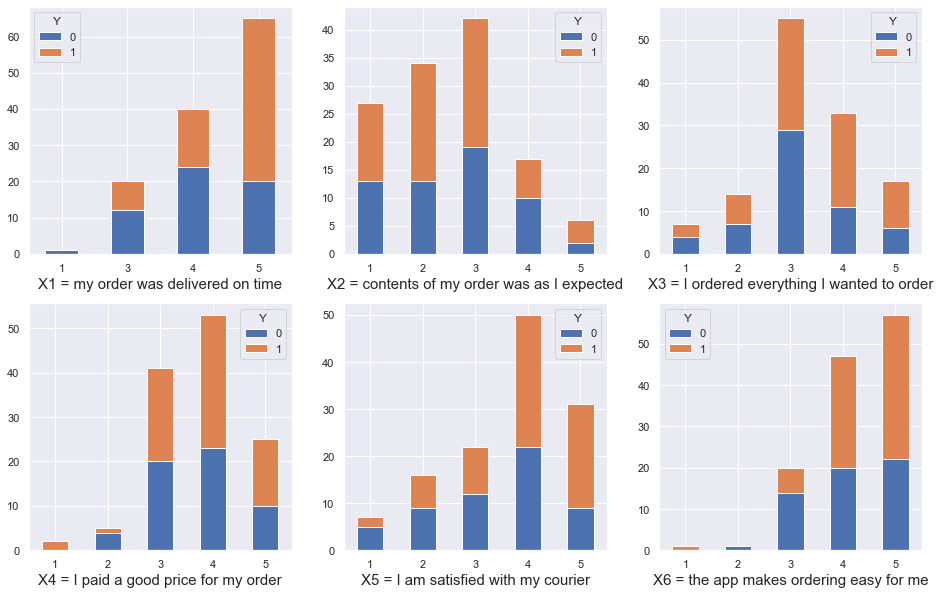

In [11]:
fig, axes = plt.subplots(2,3, figsize=(16, 10))

for col, ax, name in zip(df.columns[1:],axes.flatten(), axis_names):
    pd.crosstab(index = df[col], columns = df['Y']).plot(kind = 'bar', stacked = True, ax = ax, rot = 0)
    ax.set(xlabel=name);

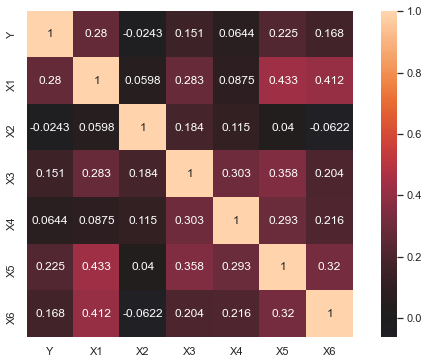

In [12]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot = True, fmt='.3g', square  = True, center = 0);

#X1, X3, X5 and X6 have low but significant correlation with the dependent variable.

# Train Test Split

In [14]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state=seed)

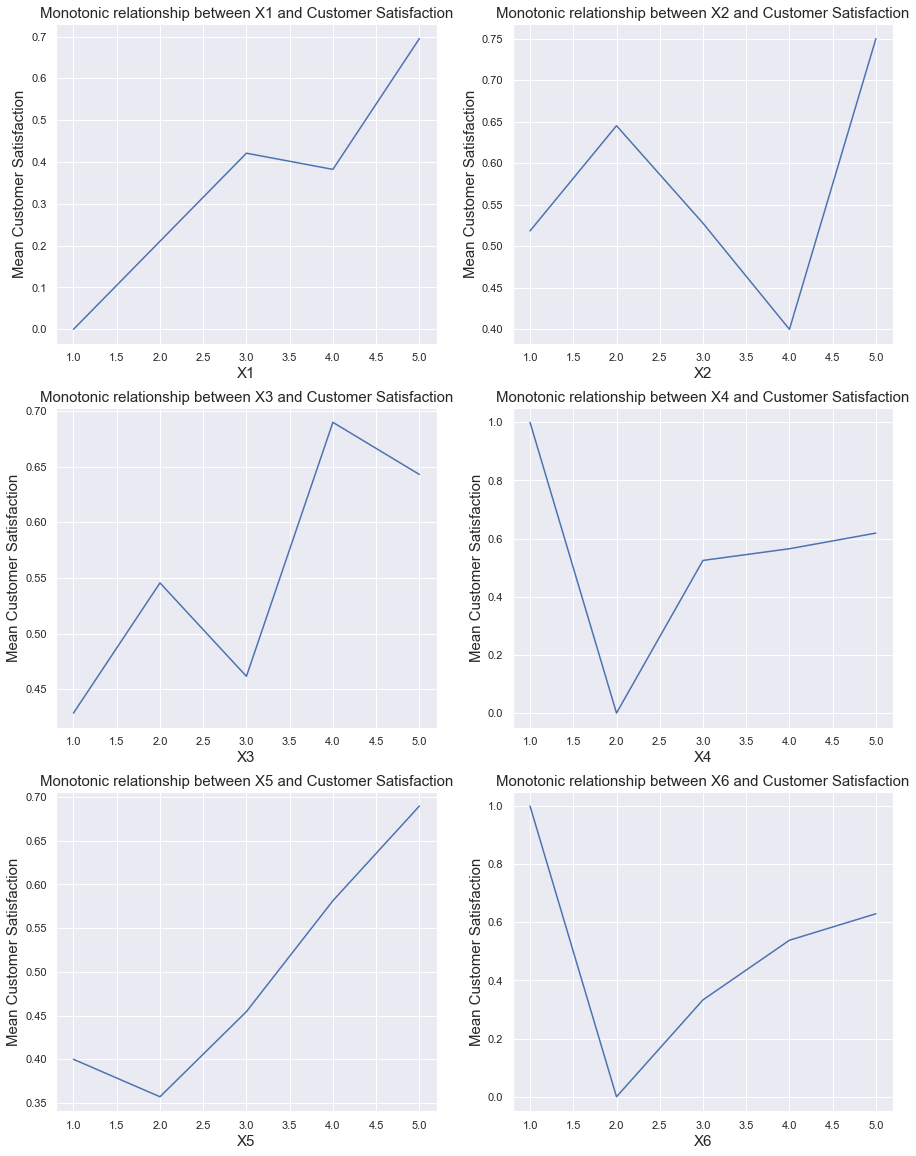

In [15]:
fig, axes = plt.subplots(3,2, figsize=(15, 20))

for col, ax in zip(X_train.columns, axes.flatten()):
    pd.concat([y_train, X_train], axis = 1).groupby(col).mean()['Y'].plot(ax = ax);
    ax.set_title(f'Monotonic relationship between {col} and Customer Satisfaction');
    ax.set_ylabel('Mean Customer Satisfaction');

There is no clear linear relationship between each feature and the target variable. Therefore, the features will be subjected to mean ncoding inorder to create a more monotonic relationship with the target variable.

In [16]:
X_train = X_train.astype('object')
X_test = X_test.astype('object')

In [17]:
from feature_engine.encoding import MeanEncoder

mean_enc = MeanEncoder()

mean_enc.fit(X_train, y_train)

X_train = mean_enc.transform(X_train)
X_test = mean_enc.transform(X_test)

print(mean_enc.variables)
print()
print(mean_enc.encoder_dict_)

['X1', 'X2', 'X3', 'X4', 'X5', 'X6']

{'X1': {1: 0.0, 3: 0.42105263157894735, 4: 0.38235294117647056, 5: 0.6949152542372882}, 'X2': {1: 0.5185185185185185, 2: 0.6451612903225806, 3: 0.5277777777777778, 4: 0.4, 5: 0.75}, 'X3': {1: 0.42857142857142855, 2: 0.5454545454545454, 3: 0.46153846153846156, 4: 0.6896551724137931, 5: 0.6428571428571429}, 'X4': {1: 1.0, 2: 0.0, 3: 0.525, 4: 0.5652173913043478, 5: 0.6190476190476191}, 'X5': {1: 0.4, 2: 0.35714285714285715, 3: 0.45454545454545453, 4: 0.5813953488372093, 5: 0.6896551724137931}, 'X6': {1: 1.0, 2: 0.0, 3: 0.3333333333333333, 4: 0.5384615384615384, 5: 0.6296296296296297}}


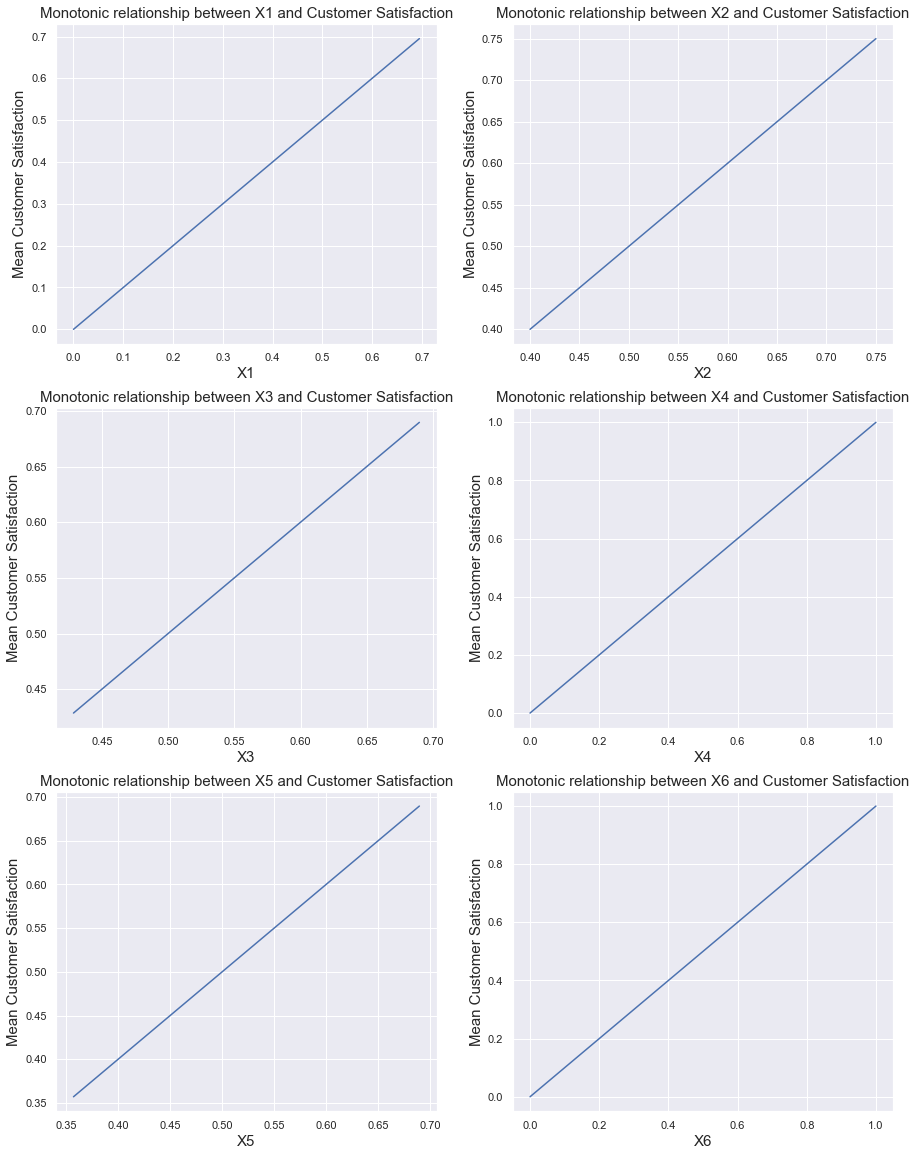

In [18]:
fig, axes = plt.subplots(3,2, figsize=(15, 20))

for col, ax in zip(X_train.columns, axes.flatten()):
    pd.concat([y_train, X_train], axis = 1).groupby(col).mean()['Y'].plot(ax = ax);
    ax.set_title(f'Monotonic relationship between {col} and Customer Satisfaction');
    ax.set_ylabel('Mean Customer Satisfaction');

After mean encoding of all features, getting a higher score improves the probability of a customer being satisfied.

# Finding the right classifier

In [19]:
#Function for selecting the right model

class classif_models:
    
    def __init__(self, Xtrain, ytrain, cv):
        self.Xtrain = Xtrain
        self.ytrain = ytrain
        self.cv = cv
        
    def check_clf_models(self):
    
        from sklearn.pipeline import Pipeline
        from sklearn.preprocessing import StandardScaler

        from sklearn.linear_model import (
            LogisticRegression,
            LogisticRegressionCV,
            SGDClassifier,
            Perceptron,
            PassiveAggressiveClassifier,
            RidgeClassifier, 
            RidgeClassifierCV
        )

        from sklearn.svm import LinearSVC, SVC, NuSVC
        from sklearn.neighbors import KNeighborsClassifier
        from sklearn.naive_bayes import  GaussianNB, BernoulliNB
        from sklearn.neural_network import MLPClassifier
        from sklearn.gaussian_process import GaussianProcessClassifier

        from sklearn import metrics

        models = [
            LogisticRegression(),
            LogisticRegressionCV(cv=5),
            SGDClassifier(tol = 0.1, early_stopping = True, validation_fraction = 0.2),
            Perceptron(tol = 0.1, early_stopping = True, validation_fraction = 0.2),
            PassiveAggressiveClassifier(tol = 0.1, early_stopping = True, validation_fraction = 0.2),
            RidgeClassifier(),
            RidgeClassifierCV(cv=5),
            LinearSVC(loss = 'hinge'),
            SVC(kernel = 'rbf'),
            NuSVC(),
            KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2),
            GaussianNB(), 
            BernoulliNB(),
            MLPClassifier(tol=0.1, early_stopping = True, validation_fraction = 0.2),
            GaussianProcessClassifier()
        ]

        final_f1_score = []
        final_score = []
        final_score_std = []
        final_roc_auc_score = []
        final_mcc_score = []
        model_names = []

        for model in models:
            pipe = Pipeline(steps = [('scaler', StandardScaler()), (type(model).__name__, model)])
            score = [] 
            f1_score = []
            roc_auc_score = []
            mcc_score = []
            fold_no = 1 
            for train_index, test_index in self.cv.split(self.Xtrain, self.ytrain): 
                X_train_kfold, X_val_kfold = self.Xtrain[train_index], self.Xtrain[test_index] 
                y_train_kfold, y_val_kfold = self.ytrain[train_index], self.ytrain[test_index] 
                pipe.fit(X_train_kfold, y_train_kfold) 
                y_pred = pipe.predict(X_val_kfold)
                score.append(metrics.accuracy_score(y_val_kfold, y_pred))
                f1_score.append(metrics.f1_score(y_val_kfold, y_pred))
                mcc_score.append(metrics.matthews_corrcoef(y_val_kfold, y_pred))

                if hasattr(model, "predict_proba"):
                    roc_auc_score.append(metrics.roc_auc_score(y_val_kfold, 
                                                               pipe.predict_proba(X_val_kfold)[:, 1]))
                else: 
                    roc_auc_score.append(metrics.roc_auc_score(y_val_kfold, 
                                                               pipe.decision_function(X_val_kfold)))

                fold_no += 1
            final_score.append(np.round(np.mean(score)*100,3))
            final_score_std.append(np.round(np.std(score)*100,3))
            final_f1_score.append(np.round(np.mean(f1_score)*100,3))
            final_roc_auc_score.append(np.round(np.mean(roc_auc_score)*100,3))
            final_mcc_score.append(np.round(np.mean(mcc_score)*100,3))
            model_names.append(type(model).__name__)

    #Using Ensemble Models

        from sklearn.tree import DecisionTreeClassifier
        from xgboost import XGBClassifier
        from catboost import CatBoostClassifier
        from lightgbm import LGBMClassifier
        from rgf.sklearn import RGFClassifier, FastRGFClassifier
        from sklearn.experimental import enable_hist_gradient_boosting

        from sklearn.ensemble import (
            RandomForestClassifier, 
            AdaBoostClassifier, 
            GradientBoostingClassifier, 
            ExtraTreesClassifier, 
            IsolationForest, 
            BaggingClassifier, 
            HistGradientBoostingClassifier
        )

        from imblearn.ensemble import (
            EasyEnsembleClassifier, 
            RUSBoostClassifier, 
            BalancedBaggingClassifier, 
            BalancedRandomForestClassifier 
        )

        tree_models = [
            DecisionTreeClassifier(criterion = 'entropy', max_depth = 6),
            RandomForestClassifier(n_estimators = 100, criterion = 'entropy', max_depth = 6), 
            XGBClassifier(use_label_encoder=False, eval_metric = 'error'), 
            CatBoostClassifier(verbose = False, loss_function='CrossEntropy', eval_metric='TotalF1'), 
            LGBMClassifier(), 
            AdaBoostClassifier(), 
            GradientBoostingClassifier(), 
            BaggingClassifier(), 
            ExtraTreesClassifier(criterion = 'entropy', max_depth = 6), 
            HistGradientBoostingClassifier(), 
            EasyEnsembleClassifier(), 
            RUSBoostClassifier(), 
            BalancedBaggingClassifier(), 
            BalancedRandomForestClassifier(n_estimators = 100, criterion = 'entropy', max_depth = 6), 
            RGFClassifier(loss = 'Log', algorithm='RGF_Sib'), 
            FastRGFClassifier(loss='LOGISTIC')
        ]

        for model in tree_models:
            score = [] 
            f1_score = []
            mcc_score = []
            fold_no = 1 
            for train_index, test_index in self.cv.split(self.Xtrain,self.ytrain): 
                X_train_kfold, X_val_kfold = self.Xtrain[train_index], self.Xtrain[test_index] 
                y_train_kfold, y_val_kfold = self.ytrain[train_index], self.ytrain[test_index] 
                classifier = model 
                classifier.fit(X_train_kfold, y_train_kfold) 
                y_pred = classifier.predict(X_val_kfold)
                
                score.append(metrics.accuracy_score(y_val_kfold, y_pred))
                
                f1_score.append(metrics.f1_score(y_val_kfold, y_pred))
                
                roc_auc_score.append(metrics.roc_auc_score(y_val_kfold, 
                                                           classifier.predict_proba(X_val_kfold)[:, 1]))
                
                mcc_score.append(metrics.matthews_corrcoef(y_val_kfold, y_pred))

                fold_no += 1
            
            final_score.append(np.round(np.mean(score)*100,3))
            final_score_std.append(np.round(np.std(score)*100,3))
            final_f1_score.append(np.round(np.mean(f1_score)*100,3))
            final_roc_auc_score.append(np.round(np.mean(roc_auc_score)*100,3))
            final_mcc_score.append(np.round(np.mean(mcc_score)*100,3))
            model_names.append(type(model).__name__)


        self.df = pd.DataFrame({
                'Models': model_names, 
                'Accuracy %': final_score, 
                'Acc_STD %': final_score_std, 
                'F1_Score %':final_f1_score,
                'ROC_AUC_Score %' :final_roc_auc_score, 
                'MCC_Score %': final_mcc_score
            }).sort_values('F1_Score %', ascending = False, ignore_index = True).style.\
                                                                highlight_max(color = 'green')

        return self.df

########################################################################################################
########################################################################################################

#For selecting the right features

def check_features(model, train_X, train_Y, feature_dict, cv):
    
    final_f1_score = []
    final_score = []
    final_score_std = []
    final_roc_auc_score = []
    final_mcc_score = []
    feat_names = []

    for name, feat in feature_dict.items():
        
        Xtrain = train_X.loc[:,feat].values
        ytrain = train_Y.values

        score = [] 
        f1_score = []
        roc_auc_score = []
        mcc_score = []
        fold_no = 1 

        for train_index, test_index in cv.split(Xtrain, ytrain): 
            X_train_kfold, X_val_kfold = Xtrain[train_index], Xtrain[test_index] 
            y_train_kfold, y_val_kfold = ytrain[train_index], ytrain[test_index] 
            classifier = model 
            classifier.fit(X_train_kfold, y_train_kfold) 
            y_pred = classifier.predict(X_val_kfold)
            score.append(metrics.accuracy_score(y_val_kfold, y_pred))
            f1_score.append(metrics.f1_score(y_val_kfold, y_pred))
            roc_auc_score.append(metrics.roc_auc_score(y_val_kfold, 
                                                           classifier.predict_proba(X_val_kfold)[:, 1]))
            mcc_score.append(metrics.matthews_corrcoef(y_val_kfold, y_pred))

            fold_no += 1

        final_score.append(np.round(np.mean(score)*100,3))
        final_score_std.append(np.round(np.std(score)*100,3))
        final_f1_score.append(np.round(np.mean(f1_score)*100,3))
        final_roc_auc_score.append(np.round(np.mean(roc_auc_score)*100,3))
        final_mcc_score.append(np.round(np.mean(mcc_score)*100,3))
        feat_names.append(name)
    
    df = pd.DataFrame({
        'Feature Selection Method': feat_names, 
        'Accuracy %': final_score, 
        'Acc_STD %': final_score_std, 
        'F1_Score %':final_f1_score,
        'ROC_AUC_Score %' :final_roc_auc_score, 
        'MCC_Score %': final_mcc_score
    }).sort_values('F1_Score %', ascending = False, ignore_index = True).style.\
                                                        highlight_max(color = 'green')
        
    return df

########################################################################################################
########################################################################################################

# classif_models(Xtrain, ytrain, cv)
# check_features(model, train_X, train_Y, feature_dict, cv)

In [20]:
from sklearn.model_selection import StratifiedKFold

all_models = classif_models(X_train.values, y_train.values, 
                            cv=StratifiedKFold(n_splits = 10, random_state=seed, shuffle = True))

all_models.check_clf_models()

,Models,Accuracy %,Acc_STD %,F1_Score %,ROC_AUC_Score %,MCC_Score %
0,CatBoostClassifier,67.273000,13.911000,70.761000,64.432000,34.945000
1,RGFClassifier,63.561000,12.683000,68.635000,62.862000,26.297000
2,GaussianNB,62.652000,15.585000,68.616000,69.595000,23.934000
3,LogisticRegression,63.636000,15.227000,68.190000,68.659000,27.908000
4,LogisticRegressionCV,62.727000,16.997000,67.887000,67.992000,25.908000
5,RidgeClassifier,62.727000,16.997000,67.887000,68.183000,25.908000
6,RidgeClassifierCV,62.727000,16.997000,67.887000,67.516000,25.908000
7,BalancedRandomForestClassifier,66.364000,10.154000,67.177000,62.505000,34.202000
8,GradientBoostingClassifier,62.727000,10.474000,66.764000,63.338000,24.937000
9,KNeighborsClassifier,61.136000,13.916000,65.437000,64.433000,22.166000


Catboost shows the highest accuracy and F1 score. But, the model can further improve if appropriate feature selection methods are done.

# Feature Selection

Chosen columns: Index(['X1', 'X4', 'X6'], dtype='object')


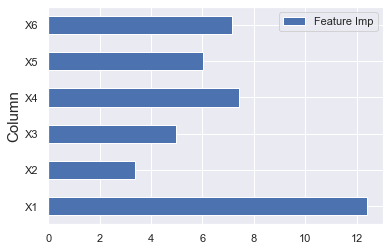

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif


sel = SelectKBest(f_classif, k = 3)
sel.fit_transform(X_train,y_train)

fi_df = pd.DataFrame({'Column':X_train.columns, 'Feature Imp':sel.scores_})
fi_df.plot(x = 'Column', y ='Feature Imp', kind = 'barh');

anova_feat = X_train.loc[:,sel.get_support()].columns

print(f'Chosen columns: {anova_feat}')

Chosen columns: Index(['X1', 'X4', 'X6'], dtype='object')


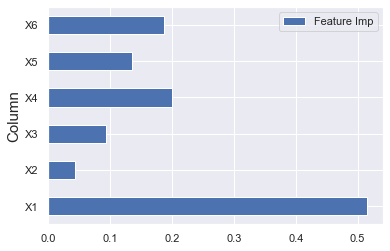

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

sel = SelectKBest(chi2, k = 3)
sel.fit_transform(X_train ,y_train)

fi_df = pd.DataFrame({'Column':X_train.columns, 'Feature Imp':sel.scores_})
fi_df.plot(x = 'Column', y ='Feature Imp', kind = 'barh');

chi2_feat = X_train.loc[:,sel.get_support()].columns

print(f'Chosen columns: {chi2_feat}')

In [23]:
#BAckward Elimination

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostClassifier

import time
start_time = time.time()

model = CatBoostClassifier(verbose = False, loss_function='CrossEntropy', eval_metric='TotalF1')

back = SFS(model, k_features=(2,4),forward=False, floating=False, scoring = 'f1', 
            cv=StratifiedKFold(n_splits=10, random_state=seed, shuffle = True))

back.fit(X_train, y_train)

print(f'Elapsed Time: {np.round((time.time() - start_time)/60,2)} min')
print() 
print(f'Best Score: {np.round(back.k_score_*100,3)} %')
    
back.k_feature_names_

Elapsed Time: 5.19 min

Best Score: 72.376 %


('X1', 'X3', 'X6')

In [24]:
#Forward Selection

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostClassifier

import time
start_time = time.time()

model = CatBoostClassifier(verbose = False, loss_function='CrossEntropy', eval_metric='TotalF1')

front = SFS(model, k_features=(2,4),forward=True, floating=False, scoring = 'f1', 
            cv=StratifiedKFold(n_splits=10, random_state=seed, shuffle = True))

front.fit(X_train, y_train)

print(f'Elapsed Time: {np.round((time.time() - start_time)/60,2)} min')
print() 
print(f'Best Score: {np.round(front.k_score_*100,3)} %')
    
front.k_feature_names_

Elapsed Time: 4.96 min

Best Score: 72.376 %


('X1', 'X3', 'X6')

In [25]:
#bidirectional Selection

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostClassifier

import time
start_time = time.time()

model = CatBoostClassifier(verbose = False, loss_function='CrossEntropy', eval_metric='TotalF1')

bi = SFS(model, k_features=(2,4),forward=True, floating=True, scoring = 'f1', 
            cv=StratifiedKFold(n_splits=10, random_state=seed, shuffle = True))

bi.fit(X_train, y_train)

print(f'Elapsed Time: {np.round((time.time() - start_time)/60,2)} min')
print() 
print(f'Best Score: {np.round(bi.k_score_*100,3)} %')
    
bi.k_feature_names_

Elapsed Time: 6.38 min

Best Score: 72.376 %


('X1', 'X3', 'X6')

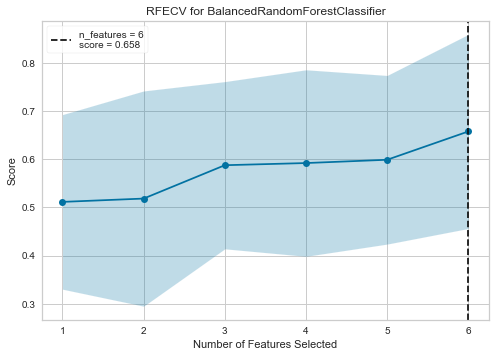

elapsed time: 0.67 min

Feature Rankings: [1 1 1 1 1 1]


In [26]:
from yellowbrick.model_selection import RFECV
from imblearn.ensemble import BalancedRandomForestClassifier

import time
start_time = time.time()

visualizer = RFECV(
    BalancedRandomForestClassifier(), 
    cv = StratifiedKFold(n_splits=10, random_state=seed, shuffle = True), 
    scoring = 'f1'
)

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show();           # Finalize and render the figure

print(f'elapsed time: {np.round((time.time() - start_time)/60,2)} min')
print()    
print(f'Feature Rankings: {visualizer.ranking_}')

rfe_feat = [X_train.columns[ind] for ind, x in enumerate(visualizer.ranking_) if x==1]

,Features,Score
0,X1,0.053267
3,X4,0.033874
2,X3,0.020625
1,X2,0.008044
5,X6,0.005063
4,X5,0.001443


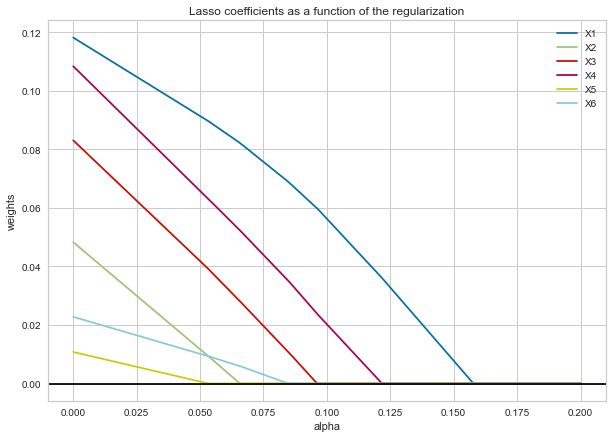

In [27]:
#Using regularization traceplots

from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# #############################################################################
# Compute paths

n_alphas = 200
alphas = np.linspace(0.0,0.2,n_alphas)

coefs = []
for a in alphas:
    lasso = Pipeline(steps = [
        ('scaler', StandardScaler()), 
        ('lasso', linear_model.Lasso(alpha=a, fit_intercept=False))
    ])
    
    lasso.fit(X_train, y_train)
    coefs.append(lasso.named_steps.lasso.coef_)

# #############################################################################
# Display results
label = X_train.columns

plt.figure(figsize = (10,7))
ax = plt.gca()
ax.plot(alphas, coefs);
plt.axhline(y=0, color='black', linestyle='-')

plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.legend(label);

coef_df = pd.DataFrame({'Features': label, 'Score':np.mean(coefs,0)})

#lasso_feat = [i for i in coef_df[coef_df['Score']>0.011535]['Features']]

coef_df.sort_values('Score', ascending = False)

In [28]:
lasso_feat = ['X1', 'X3', 'X4', 'X6']

In [29]:
selected_features = { 
    'chi_squared': chi2_feat, 
    'ANOVA': anova_feat, 
    'back_elimination': back.k_feature_names_, 
    'front_elimination': front.k_feature_names_,
    'bidirectional_elimination': bi.k_feature_names_,
    'LASSO_regularization': lasso_feat,  
    'recursive_feature_elimination': rfe_feat
}

model = CatBoostClassifier(verbose = False, loss_function='CrossEntropy', eval_metric='TotalF1')

check_features(model, X_train, y_train, feature_dict = selected_features, 
               cv = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True))

,Feature Selection Method,Accuracy %,Acc_STD %,F1_Score %,ROC_AUC_Score %,MCC_Score %
0,back_elimination,68.864000,12.890000,72.376000,71.504000,39.542000
1,front_elimination,68.864000,12.890000,72.376000,71.504000,39.542000
2,bidirectional_elimination,68.864000,12.890000,72.376000,71.504000,39.542000
3,recursive_feature_elimination,67.273000,13.911000,70.761000,74.722000,34.945000
4,LASSO_regularization,68.106000,9.845000,70.572000,73.476000,37.588000
5,chi_squared,60.076000,8.638000,66.700000,63.063000,21.452000
6,ANOVA,60.076000,8.638000,66.700000,63.063000,21.452000


In [30]:
all_models = classif_models(X_train.loc[:,back.k_feature_names_].values, y_train.values, 
                            cv=StratifiedKFold(n_splits = 10, random_state=seed, shuffle = True))

all_models.check_clf_models()

,Models,Accuracy %,Acc_STD %,F1_Score %,ROC_AUC_Score %,MCC_Score %
0,CatBoostClassifier,68.864000,12.890000,72.376000,68.690000,39.542000
1,RandomForestClassifier,68.864000,12.890000,71.863000,67.599000,40.038000
2,DecisionTreeClassifier,67.121000,14.331000,70.590000,67.024000,35.028000
3,ExtraTreesClassifier,65.303000,14.654000,70.322000,67.082000,31.176000
4,XGBClassifier,67.197000,14.930000,70.125000,67.986000,36.667000
5,RGFClassifier,65.227000,11.521000,69.462000,66.323000,31.245000
6,BalancedRandomForestClassifier,66.136000,12.745000,69.112000,66.029000,32.782000
7,BalancedBaggingClassifier,66.288000,16.021000,68.901000,65.977000,34.971000
8,GradientBoostingClassifier,63.561000,11.680000,68.491000,66.882000,28.778000
9,BaggingClassifier,64.773000,15.111000,68.484000,66.982000,31.291000


The features selected after backward elimination are the chosen features. Catboost has repeatdly scored better accuracy for this dataset. X1, X3 and X6 are the chosen features.

In [32]:
X_train_pars = X_train.loc[:,back.k_feature_names_]
X_test_pars = X_test.loc[:,back.k_feature_names_]

# Hyperparameter Tuning

Best Accuracy: -77.85534073769368 %, Elapsed Time: 10.57 min
Best parameters:
depth=7, 
iterations=221,
learning_rate=0.31430, 
l2_leaf_reg=7.02867,
border_count=111, 
boosting_type='Plain' 


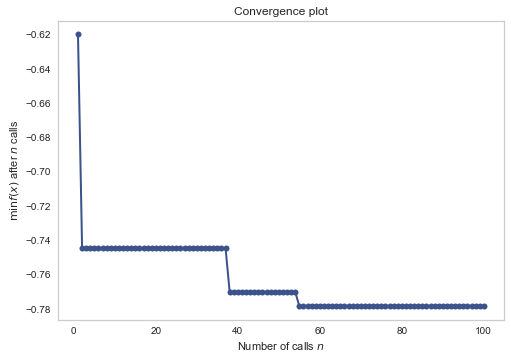

In [40]:
from sklearn.model_selection import cross_val_score

from skopt import gp_minimize
from skopt.plots import plot_convergence
from skopt.space import Real, Integer, Categorical #Real = float
from skopt.utils import use_named_args

import time
from catboost import CatBoostClassifier

param_grid = [
    Integer(1, 7, name="depth"),
    Integer(200, 1000, name="iterations"),
    Real(0.001, 0.4, name = "learning_rate"),
    Real(1.0, 100.0, name = "l2_leaf_reg"),
    Integer(5, 200, name="border_count"),
    Categorical(['Ordered', 'Plain'], name = "boosting_type")
]

cat = CatBoostClassifier(verbose = False, loss_function='CrossEntropy', eval_metric='TotalF1')

@use_named_args(param_grid)
def objective(**params):
    
    # model with new parameters
    cat.set_params(**params)

    # optimization function (hyperparam response function)
    value = np.mean(cross_val_score(cat, X_train_pars, y_train,
                                    cv=StratifiedKFold(n_splits=10, random_state=seed, shuffle=True),
                                    n_jobs=-1, scoring='f1')
                   )

    # negate because we need to minimize
    return -value

start_time = time.time()

gp_ = gp_minimize(
    objective, # the objective function to minimize
    param_grid, # the hyperparameter space
    n_initial_points=20, # the number of points to evaluate f(x) to start of
    acq_func='EI', # the acquisition function
    n_calls=100, # the number of subsequent evaluations of f(x)
    random_state=seed, 
)

print(f'Best Accuracy: {gp_.fun*100} %, Elapsed Time: {np.round((time.time() - start_time)/60,2)} min')

print("""Best parameters:
=========================
depth=%d, 
iterations=%d,
learning_rate=%.5f, 
l2_leaf_reg=%.5f,
border_count=%d, 
boosting_type='%s' """ % (gp_.x[0], gp_.x[1], gp_.x[2], gp_.x[3], gp_.x[4], gp_.x[5]))

plot_convergence(gp_);

# Model Validation

In [42]:
class validate_on_test:
    
    def __init__(self, model, Xtrain, ytrain, Xtest, ytest, cv):
        self.model = model
        self.Xtrain = Xtrain
        self.ytrain = ytrain
        self.Xtest = Xtest
        self.ytest = ytest
        self.cv = cv
        
    def evaluate_model(self):
    
        from sklearn import metrics
        import scikitplot as skplt
        import matplotlib.pyplot as plt

        model_name = type(self.model).__name__
        
        print('================================================')
        print(f'Model: *** {model_name} ***')
        print('================================================')
        print()

        score = []
        fold_no = 1

        for train_index, test_index in self.cv.split(self.Xtrain,self.ytrain):
            print(f'{fold_no} of kfold {self.cv.n_splits}')
            X_train_kfold, X_val_kfold = self.Xtrain[train_index], self.Xtrain[test_index]
            y_train_kfold, y_val_kfold = self.ytrain[train_index], self.ytrain[test_index]

            classifier = self.model

            classifier.fit(X_train_kfold, y_train_kfold) 
            y_pred = classifier.predict(X_val_kfold)
            print(f'Accuracy: {metrics.accuracy_score(y_val_kfold, y_pred)*100} %')
            score.append(metrics.accuracy_score(y_val_kfold, y_pred))
            fold_no += 1
        print()
        print(f'Mean CV Accuracy: {np.round(np.mean(score)*100,3)} ± {np.round(np.std(score)*100,1)} %')
        print()
        print("---" * 40)

        classifier.fit(self.Xtrain,self.ytrain)
        y_pred = classifier.predict(self.Xtest)
        y_probs = classifier.predict_proba(self.Xtest)
        
        self.y_probs = y_probs

        print()
        print('====================================')
        print("Classification report on Test set:")
        print('====================================')
        print()
        print(metrics.classification_report(self.ytest, y_pred))
        print()
        print("---" * 40)
        print()
        print('=============================================================')
        print(f'*** {model_name} scores on TEST set ***')
        print('=============================================================')
        print()
        print(f'** F1 score: {np.round(metrics.f1_score(self.ytest, y_pred)*100,3)} % **')
        print() 
        print(f'** Accuracy: {np.round(metrics.accuracy_score(self.ytest, y_pred)*100,3)} % **')
        print()
        print(f'** ROC AUC Score: {np.round(metrics.roc_auc_score(self.ytest, y_probs[:,1])*100,3)} % **')
        print()
        
        print("---" * 40)
        print()

        # apply threshold to positive probabilities to create labels
        print('Estimating new probability threshold.........Please Wait..............', end = '')
        print()
        
        thresholds = np.arange(0, 1, 0.001)

        # apply threshold to positive probabilities to create labels
        def to_labels(pos_probs, threshold):
            return (pos_probs >= threshold).astype('int')

        # evaluate each threshold
        self.scores = [metrics.f1_score(self.ytest, to_labels(self.y_probs[:,1], t)) for t in thresholds]

        # get best threshold
        ix = np.argmax(self.scores)
        
        self.new_prob_threshold = thresholds[ix]
        
        print('Done')
        print('** Threshold = %.3f, F-Score = %.3f **' % (thresholds[ix]*100, self.scores[ix]*100))
        print()

        self.tuned_pred = np.where(classifier.predict_proba(self.Xtest)[:,1] >= thresholds[ix],1,0)
        new_acc = metrics.accuracy_score(self.ytest, self.tuned_pred)
        new_f1 = metrics.f1_score(self.ytest, self.tuned_pred)
        
        print('==============================================================')
        print(f'*** New Scores with tuned probability threshold: {np.round(thresholds[ix]*100,3)} % ***')
        print('==============================================================')
        print()
        print(f'{model_name} F1 Score: {np.round(new_f1*100,3)} %')
        print()
        print(f'{model_name} Accuracy: {np.round(new_acc*100,3)} %')
        print()
        print("---" * 40)

        skplt.metrics.plot_roc(self.ytest, y_probs);
        
        print('====================================================')
        print(f'    *** ROC AUC Plot and Confusion Matrix ***')
        print('====================================================')
        
        fig = plt.figure(figsize = (15,5));
        ax1 = fig.add_subplot(121);
        ax2 = fig.add_subplot(122);
        
        skplt.metrics.plot_confusion_matrix(self.ytest, y_pred, ax = ax1, text_fontsize = 'large', 
                                            cmap='YlGn');
    
        
        skplt.metrics.plot_confusion_matrix(self.ytest, self.tuned_pred, ax = ax2, text_fontsize = 'large',
                                            cmap='YlGn');
        
        ax1.title.set_text('With Prob. Threshold = 50 %');
        ax2.title.set_text(f'With New Prob. Threshold = {np.round(thresholds[ix]*100,2)} %');

Model: *** CatBoostClassifier ***

1 of kfold 10
Accuracy: 91.66666666666666 %
2 of kfold 10
Accuracy: 75.0 %
3 of kfold 10
Accuracy: 66.66666666666666 %
4 of kfold 10
Accuracy: 90.9090909090909 %
5 of kfold 10
Accuracy: 45.45454545454545 %
6 of kfold 10
Accuracy: 54.54545454545454 %
7 of kfold 10
Accuracy: 72.72727272727273 %
8 of kfold 10
Accuracy: 72.72727272727273 %
9 of kfold 10
Accuracy: 72.72727272727273 %
10 of kfold 10
Accuracy: 63.63636363636363 %

Mean CV Accuracy: 70.606 ± 13.6 %

------------------------------------------------------------------------------------------------------------------------

Classification report on Test set:

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.78      1.00      0.88         7

    accuracy                           0.85        13
   macro avg       0.89      0.83      0.84        13
weighted avg       0.88      0.85      0.84        13


----------------

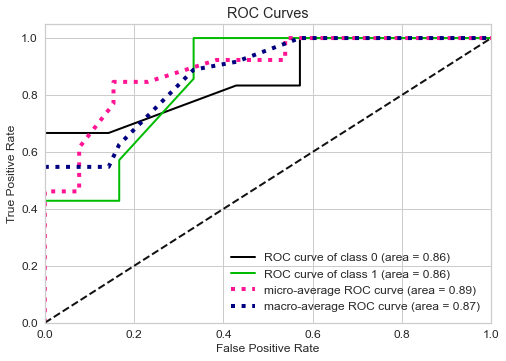

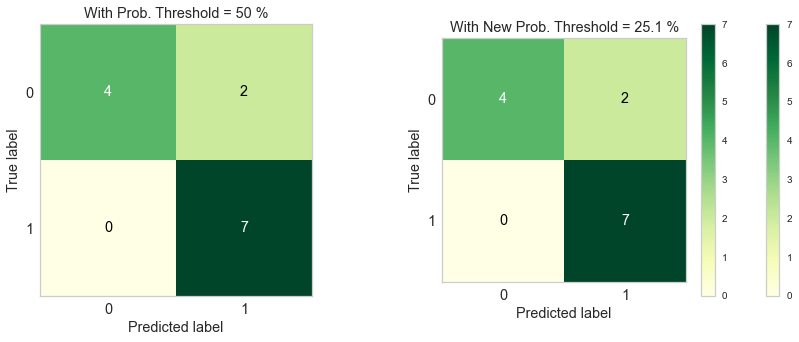

In [43]:
model = CatBoostClassifier(
    verbose = False, 
    loss_function='CrossEntropy', 
    eval_metric='TotalF1',
    depth=7, 
    iterations=221,
    learning_rate=0.31430, 
    l2_leaf_reg=7.02867,
    border_count=111, 
    boosting_type='Plain'
)

bal_rf_result = validate_on_test(model, X_train_pars.values, y_train.values, 
                                 X_test_pars.values, y_test.values, 
                                 cv = StratifiedKFold(n_splits=10, random_state=seed, shuffle = True)).\
                                                                                        evaluate_model()

On the test set, CatBoost managed to get approximatly 85% accuracy.

One of the main limitations is that the dataset is quite small. Hence, more data is needed in order to truly establish the validity and also to improve the predicitability of the model.